# Lesson 1: Hello AI
This Jupyter notebook the first lesson of a learning track for learning the basics of the OpenAI API with Code the Dream.

Main objective: set up the OpenAI API, securely store the API key, make sure things are working by generating a response using `gpt-4o-mini`. 

To keep in mind:    
- **API Key Security**: Using os.getenv() prevents exposure exposure in code. Never commit API key to version control or hardcode API keys. See [OpenAI API Key Best Practices](https://help.openai.com/en/articles/5112595-best-practices-for-api-key-safety).
- **Cost Management**: Use `gpt-4o-mini` and `text-embedding-3-small` for cost efficiency. Monitor `response.usage` to track token costs.
- **Error Handling**: Use try-except blocks to handle API errors (e.g., rate limits, invalid keys).
- **Prompt Design**: The prompt is specific (150 words max, key features) to ensure relevant output. Learn more at [OpenAI Prompt Engineering](https://platform.openai.com/docs/guides/prompt-engineering).
- **Documentation**: Refer to OpenAI’s official docs for most up-to-date references.
  - [Quickstart](https://platform.openai.com/docs/quickstart)
  - [API Reference](https://platform.openai.com/docs/api-reference)







## 1: Setup and initial testing

**Objective**: Set up the OpenAI API, make sure your API key is securely stored, and generate a response using `gpt-4o-mini`.

Note today we aren't getting into any *details* of the API, we are focusing on secure setup and getting it running without errors. 

TODO: 
- Add details about API keys and how to set env variable, how to handle them properly (e.g., NEVER put them in code, never commit to VCS)
- Discuss dotenv to handle API key in .env file and contrast with setting at shell-level using bash (which is much safer)

In [1]:
from openai import OpenAI
import os
from IPython.display import Markdown, display, YouTubeVideo

In [2]:
def printmd(text):
    """
    print md in code cells
    """
    display(Markdown(text))

Initialize OpenAI client with API key that has been set as environment variable.

In [3]:
try:
    client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
except Exception as e:
    print(f"Error initializing OpenAI client: {e}")
    raise

Set prompt discussing bias in AI: 

In [4]:
prompt = """You are a software engineer concerned with social equality and justice. Please tell us the 
top three ways that AI models that AI models display bias in their training data. Also list two ways to 
defend against such biases when writing prompts for LLMs."""
print(prompt)

You are a software engineer concerned with social equality and justice. Please tell us the 
top three ways that AI models that AI models display bias in their training data. Also list two ways to 
defend against such biases when writing prompts for LLMs.


Make the API call: note we will learn more about this in the second notebook we are just making sure this works without throwing an error:

In [5]:
try:
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ],
        max_tokens=500,
        temperature=0.7  # Balances creativity and consistency
    )
except Exception as e:
    print(f"Error calling OpenAI API: {e}")

Print the reply

In [6]:
printmd("**Generated response:**")
print(response.choices[0].message.content)

**Generated response:**

AI models, including large language models (LLMs), can exhibit bias in various ways due to the nature of their training data. Here are the top three ways that bias can manifest:

### 1. **Representation Bias**
   - **Description**: If the training data lacks diversity or is skewed towards certain demographics, the AI model may not accurately represent the perspectives and experiences of underrepresented groups. For example, if a model is trained predominantly on English-language data, it may perform poorly on inputs from other languages or cultural contexts.
   - **Impact**: This can lead to outputs that reinforce stereotypes or neglect important cultural nuances.

### 2. **Label Bias**
   - **Description**: When training data is labeled based on subjective human judgments, it can inherit the biases of those annotators. For example, if sentiment analysis data is labeled with a bias towards positive or negative sentiments based on cultural or societal norms, the model will learn to repl

Print token usage for cost monitoring

TODO: convert to actual cost by getting cost/token

In [7]:
print(f"\nToken Usage: {response.usage.total_tokens} tokens")


Token Usage: 559 tokens


Hopefully this whets your appetite. With minimal code, we can leverage the power of AI and start to incorporate it into our applications. We could ask it about how to do analysis, etc. 

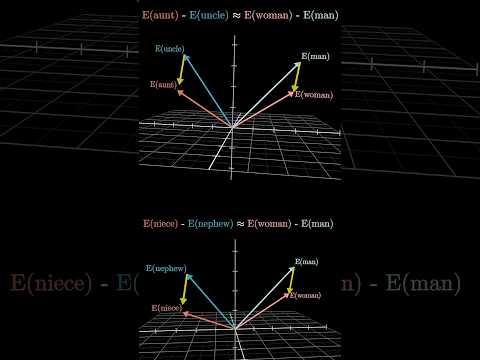

In [10]:
# Initialize OpenAI client
try:
    client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
except Exception as e:
    print(f"Error initializing OpenAI client: {e}")
    raise

Movie summaries that we will use to detect semantic similaties. 

In [11]:
movies = [
    # Marvel Superhero Movies
    {
        "title": "Iron Man (2008)",
        "summary": "Billionaire genius Tony Stark builds a high-tech suit to escape captivity and becomes Iron Man, fighting global threats with his wit and advanced technology."
    },
    {
        "title": "The Avengers (2012)",
        "summary": "Earth’s mightiest heroes, including Iron Man, Captain America, Thor, and Hulk, unite to stop Loki and his alien army from conquering the planet."
    },
    {
        "title": "Black Panther (2018)",
        "summary": "T’Challa, king of Wakanda, embraces his role as Black Panther to protect his nation and the world from a powerful enemy threatening their vibranium resources."
    },
    {
        "title": "Spider-Man: No Way Home (2021)",
        "summary": "Peter Parker, unmasked as Spider-Man, teams up with alternate-universe heroes to battle villains from across the multiverse after a spell goes wrong."
    },
    {
        "title": "Captain Marvel (2019)",
        "summary": "Carol Danvers unlocks her cosmic powers as Captain Marvel, joining the fight against the Kree-Skrull war while uncovering her lost memories on Earth."
    },
    # Christmas-Themed Movies
    {
        "title": "Home Alone (1990)",
        "summary": "Young Kevin is accidentally left behind during Christmas vacation and must defend his home from bumbling burglars with clever traps and holiday spirit."
    },
    {
        "title": "Elf (2003)",
        "summary": "Buddy, a human raised by elves, journeys to New York City to find his real father, spreading Christmas cheer in a world that’s lost its festive spark."
    },
    {
        "title": "The Polar Express (2004)",
        "summary": "A young boy boards a magical train to the North Pole, embarking on a heartwarming adventure that tests his belief in the magic of Christmas."
    },
    {
        "title": "A Christmas Carol (2009)",
        "summary": "Ebenezer Scrooge, a miserly old man, is visited by three ghosts on Christmas Eve, learning the value of kindness and the true meaning of the holiday."
    },
    {
        "title": "Love Actually (2003)",
        "summary": "Interwoven stories of love, loss, and connection unfold in London during the Christmas season, celebrating the messy beauty of human relationships."
    },
    # Romantic Comedies
    {
        "title": "When Harry Met Sally... (1989)",
        "summary": "Harry and Sally’s evolving friendship over years sparks debates about love and friendship, culminating in a heartfelt realization during a New Year’s Eve confession."
    },
    {
        "title": "The Proposal (2009)",
        "summary": "A high-powered executive forces her assistant into a fake engagement to avoid deportation, leading to unexpected romance during a chaotic family weekend in Alaska."
    },
    {
        "title": "Crazy Rich Asians (2018)",
        "summary": "Rachel Chu accompanies her boyfriend to Singapore, facing his ultra-wealthy family’s disapproval in a whirlwind of opulence, tradition, and newfound love."
    },
    {
        "title": "10 Things I Hate About You (1999)",
        "summary": "A rebellious teen, Kat, is wooed by bad-boy Patrick in a modern Shakespearean tale of high school romance, deception, and heartfelt connection."
    },
    {
        "title": "Notting Hill (1999)",
        "summary": "A humble London bookseller falls for a famous American actress, navigating fame, cultural clashes, and personal insecurities to pursue an unlikely love story."
    }
]

In [12]:
movie_summaries = [movie['summary'] for movie in movies]
movie_titles = [movie['title'] for movie in movies]
pprint(movie_summaries)

['Billionaire genius Tony Stark builds a high-tech suit to escape captivity '
 'and becomes Iron Man, fighting global threats with his wit and advanced '
 'technology.',
 'Earth’s mightiest heroes, including Iron Man, Captain America, Thor, and '
 'Hulk, unite to stop Loki and his alien army from conquering the planet.',
 'T’Challa, king of Wakanda, embraces his role as Black Panther to protect his '
 'nation and the world from a powerful enemy threatening their vibranium '
 'resources.',
 'Peter Parker, unmasked as Spider-Man, teams up with alternate-universe '
 'heroes to battle villains from across the multiverse after a spell goes '
 'wrong.',
 'Carol Danvers unlocks her cosmic powers as Captain Marvel, joining the fight '
 'against the Kree-Skrull war while uncovering her lost memories on Earth.',
 'Young Kevin is accidentally left behind during Christmas vacation and must '
 'defend his home from bumbling burglars with clever traps and holiday spirit.',
 'Buddy, a human raised by

Generate embeddings for the reviews

The `text-embedding-3-small` model converts text into numerical vectors and captures the "meaning" of the input text (in this case the movie reviews). This can be extremely useful for sentiment analysis or clustering in analytics pipelines.

TODO: add more discussion (3blue1brown video above captures this; this view has a deep history and is the basis for self-attention).

In [13]:
try:
    embeddings = []
    for summary in movie_summaries:
        response = client.embeddings.create(
            model="text-embedding-3-small",
            input=summary
        )
        embeddings.append(response.data[0].embedding)
    embeddings = np.array(embeddings)
except Exception as e:
    print(f"Error generating embeddings: {e}")
    raise

Get cosine similarity between reviews.

Cosine Similarity measures similarity between reviews (1 = identical, 0 = unrelated). It can help identify similar content (e.g., for recommendation systems : if you like this movie, you might like that movie).

Following cell is incomprehensible, need to improve. 

TODO: use seaborn to visualize as heatmap, or maybe just cut?

In [14]:
similarity_matrix = cosine_similarity(embeddings)
printmd("**Cosine Similarity Matrix:**")
pprint(similarity_matrix)

**Cosine Similarity Matrix:**

array([[1.        , 0.44638748, 0.35987185, 0.41178667, 0.31059084,
        0.22011265, 0.19328305, 0.12573146, 0.13143264, 0.04527634,
        0.12584849, 0.17852108, 0.17512584, 0.21035201, 0.16859286],
       [0.44638748, 1.        , 0.4029404 , 0.45721963, 0.40754198,
        0.19718652, 0.2336915 , 0.17151516, 0.164055  , 0.10166716,
        0.11117503, 0.14923686, 0.11043629, 0.11242099, 0.11820223],
       [0.35987185, 0.4029404 , 1.        , 0.33928751, 0.32624654,
        0.15764395, 0.16259981, 0.13170946, 0.08875937, 0.09458414,
        0.04942586, 0.12633012, 0.15928384, 0.16117361, 0.09758416],
       [0.41178667, 0.45721963, 0.33928751, 1.        , 0.41819573,
        0.24223534, 0.28904873, 0.1769743 , 0.16685875, 0.15327498,
        0.2077566 , 0.20939409, 0.17345976, 0.23766342, 0.21863238],
       [0.31059084, 0.40754198, 0.32624654, 0.41819573, 1.        ,
        0.22879443, 0.16595081, 0.14302146, 0.09773057, 0.15119973,
        0.13582243, 0.2027124 , 0.14648104, 

In [15]:
embeddings.shape

(15, 1536)

Examine embeddings in 2d using PCA

PCA reduces high-dimensional embeddings (1500-dimensions) to 2D for intuitive plots, making embeddings easy to visualize. It makes more clear the similarity relations that the cosine metric measures. See [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

It's hard to overstate how important this kind of perspective is in the development of LLMs/self-attention etc!

TODO: 
- Make the following 2d projection interactive (plotly, bokeh, matplotlib) -- hover and show title. 
- Discuss other embeddings: umap, tsne.

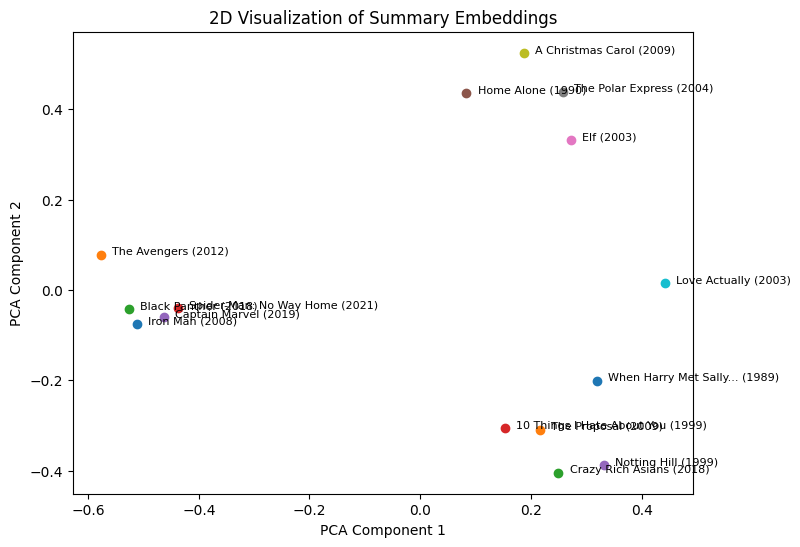

In [16]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Visualize embeddings
plt.figure(figsize=(8, 6))
for i, summary in enumerate(movie_summaries):
    title = movie_titles[i]
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.text(embeddings_2d[i, 0] + 0.02, embeddings_2d[i, 1], title, size=8)
plt.title("2D Visualization of Summary Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()